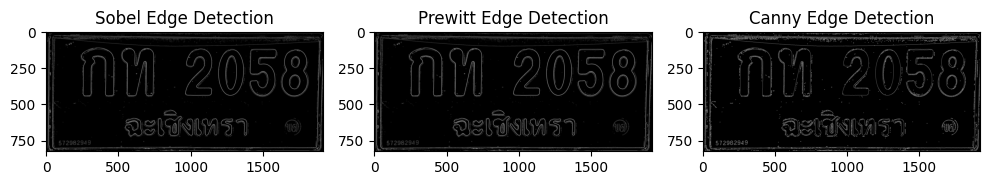

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

# Load the image
image_path = '888.jpg'  # Replace with your image path
image = cv2.imread(image_path)


# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel, Prewitt, and Canny edge detection
sobel_edges = filters.sobel(gray_image)
prewitt_edges = filters.prewitt(gray_image)
canny_edges = cv2.Canny(gray_image, 100, 200)

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Prewitt Edge Detection")
plt.imshow(prewitt_edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')

plt.tight_layout()
plt.show()


C:\Users\Waraphorn_2546\AppData\Local\Temp\ipykernel_37244\92098295.py:33: RuntimeWarning: overflow encountered in scalar add
  region_mean = (region_mean + img[y + i, x + j]) / 2


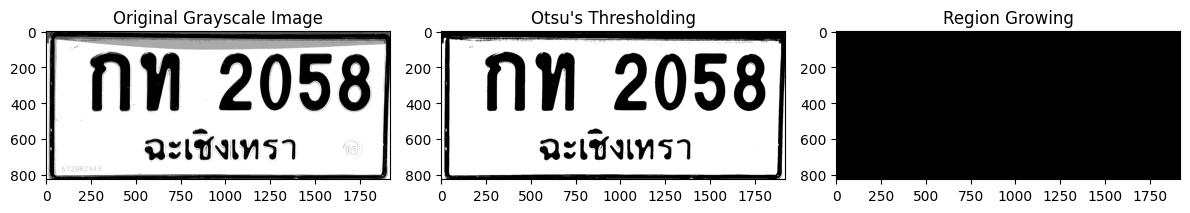

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

# Load the image
image_path = '888.jpg'  # Replace with your image path
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Otsu's Thresholding
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 2. Region Growing
def region_growing(img, seed, threshold=10):
    height, width = img.shape
    segmented_img = np.zeros_like(img)
    segmented_img[seed] = 255  # Start from seed point
    growing = True
    region_mean = img[seed]
    
    while growing:
        growing = False
        for y in range(height):
            for x in range(width):
                if segmented_img[y, x] == 255:
                    for i in range(-1, 2):
                        for j in range(-1, 2):
                            if (0 <= y + i < height and 0 <= x + j < width and segmented_img[y + i, x + j] == 0):
                                if abs(int(img[y + i, x + j]) - int(region_mean)) < threshold:
                                    segmented_img[y + i, x + j] = 255
                                    growing = True
                                    region_mean = (region_mean + img[y + i, x + j]) / 2
    return segmented_img

# Select a seed point for region growing
seed_point = (100, 100)  # Adjust to your desired seed point
region_grown = region_growing(gray_image, seed_point)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Otsu's Thresholding")
plt.imshow(otsu_thresh, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Region Growing")
plt.imshow(region_grown, cmap='gray')

plt.tight_layout()
plt.show()


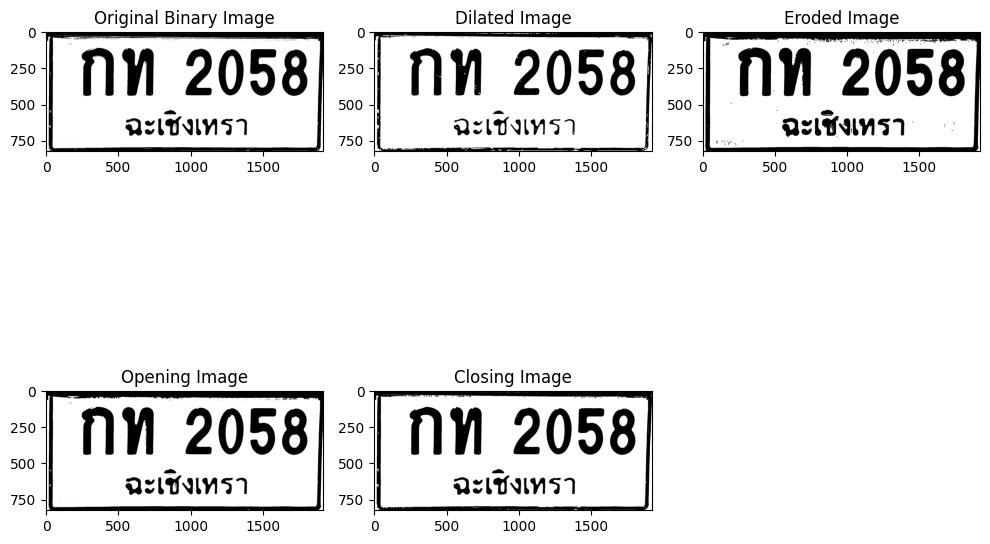

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale
image_path = '888.jpg'  # Replace with your image path
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# 1. Dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# 2. Erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# 3. Opening (Erosion followed by Dilation)
opening_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# 4. Closing (Dilation followed by Erosion)
closing_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Plot the results of morphological operations
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.title("Original Binary Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Opening Image")
plt.imshow(opening_image, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("Closing Image")
plt.imshow(closing_image, cmap='gray')

plt.tight_layout()
plt.show()


C:\Users\Waraphorn_2546\AppData\Local\Temp\ipykernel_37244\2077760166.py:43: RuntimeWarning: overflow encountered in scalar add
  region_mean = (region_mean + gray_image[y + i, x + j]) / 2


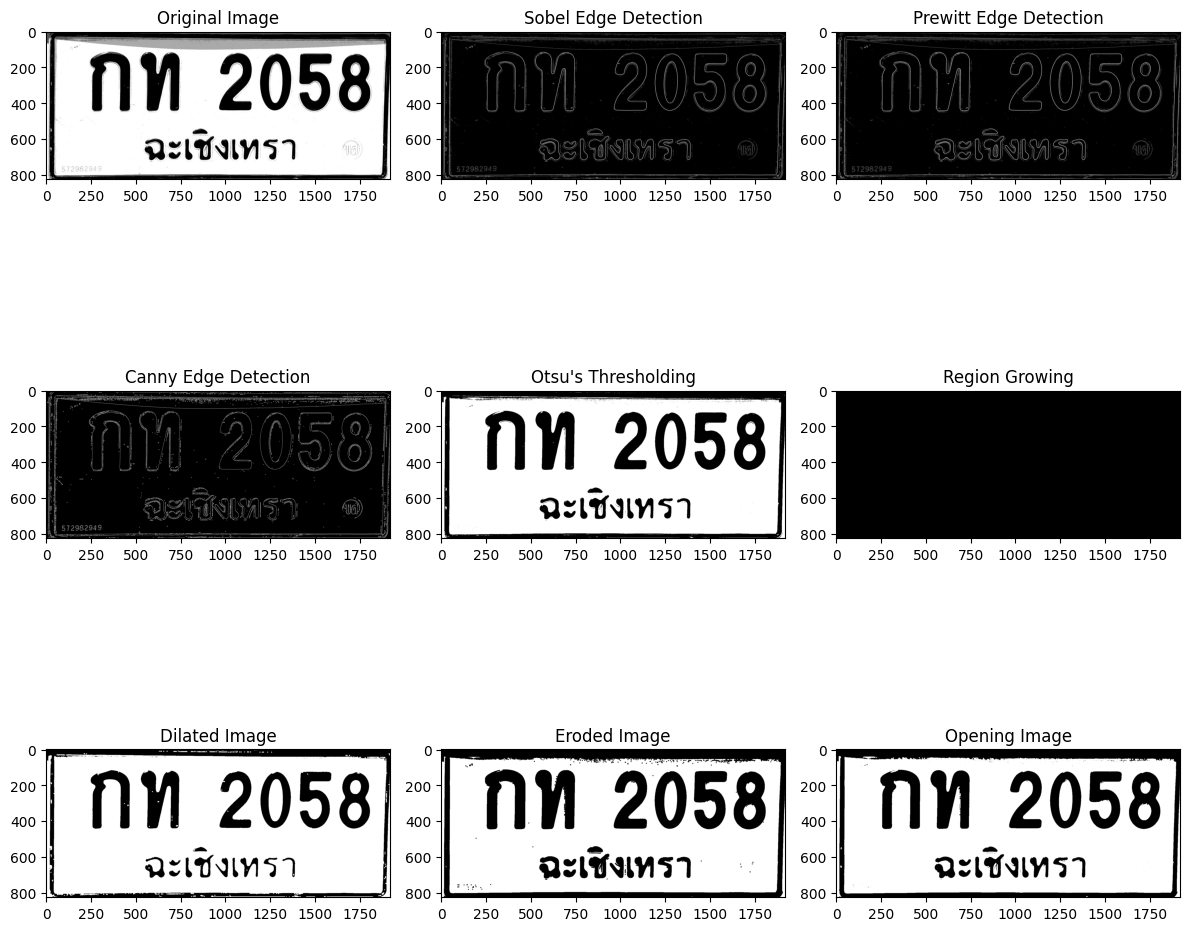

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

# Function for edge detection
def edge_detection(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Sobel, Prewitt, and Canny edge detection
    sobel_edges = filters.sobel(gray_image)
    prewitt_edges = filters.prewitt(gray_image)
    canny_edges = cv2.Canny(gray_image, 100, 200)
    
    return sobel_edges, prewitt_edges, canny_edges

# Function for Otsu's Thresholding
def otsu_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_thresh

# Function for Region Growing
def region_growing(image, seed, threshold=10):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    height, width = gray_image.shape
    segmented_img = np.zeros_like(gray_image)
    segmented_img[seed] = 255
    growing = True
    region_mean = gray_image[seed]
    
    while growing:
        growing = False
        for y in range(height):
            for x in range(width):
                if segmented_img[y, x] == 255:
                    for i in range(-1, 2):
                        for j in range(-1, 2):
                            if (0 <= y + i < height and 0 <= x + j < width and segmented_img[y + i, x + j] == 0):
                                if abs(int(gray_image[y + i, x + j]) - int(region_mean)) < threshold:
                                    segmented_img[y + i, x + j] = 255
                                    growing = True
                                    region_mean = (region_mean + gray_image[y + i, x + j]) / 2
    return segmented_img

# Function for Morphological Operations
def morphological_operations(binary_image):
    kernel = np.ones((5, 5), np.uint8)
    
    # Dilation
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
    
    # Erosion
    eroded_image = cv2.erode(binary_image, kernel, iterations=1)
    
    # Opening (Erosion followed by Dilation)
    opening_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    
    # Closing (Dilation followed by Erosion)
    closing_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    
    return dilated_image, eroded_image, opening_image, closing_image

# Function to visualize results
def visualize_results(original_image, edge_results, otsu_result, region_growing_result, morph_results):
    sobel_edges, prewitt_edges, canny_edges = edge_results
    dilated_image, eroded_image, opening_image, closing_image = morph_results
    
    plt.figure(figsize=(12, 12))
    
    # Edge Detection Results
    plt.subplot(3, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    
    plt.subplot(3, 3, 2)
    plt.title("Sobel Edge Detection")
    plt.imshow(sobel_edges, cmap='gray')
    
    plt.subplot(3, 3, 3)
    plt.title("Prewitt Edge Detection")
    plt.imshow(prewitt_edges, cmap='gray')
    
    plt.subplot(3, 3, 4)
    plt.title("Canny Edge Detection")
    plt.imshow(canny_edges, cmap='gray')
    
    # Segmentation Results
    plt.subplot(3, 3, 5)
    plt.title("Otsu's Thresholding")
    plt.imshow(otsu_result, cmap='gray')
    
    plt.subplot(3, 3, 6)
    plt.title("Region Growing")
    plt.imshow(region_growing_result, cmap='gray')
    
    # Morphological Operations Results
    plt.subplot(3, 3, 7)
    plt.title("Dilated Image")
    plt.imshow(dilated_image, cmap='gray')
    
    plt.subplot(3, 3, 8)
    plt.title("Eroded Image")
    plt.imshow(eroded_image, cmap='gray')
    
    plt.subplot(3, 3, 9)
    plt.title("Opening Image")
    plt.imshow(opening_image, cmap='gray')
    
    plt.tight_layout()
    plt.show()

# Main function to execute all tasks
def main(image_path):
    # Load the image
    original_image = cv2.imread(image_path)
    
    # Apply edge detection
    edge_results = edge_detection(original_image)
    
    # Apply Otsu's thresholding
    otsu_result = otsu_thresholding(original_image)
    
    # Apply region growing
    seed_point = (100, 100)  # Adjust this based on your image
    region_growing_result = region_growing(original_image, seed_point)
    
    # Apply morphological operations on the binary image (Otsu result)
    morph_results = morphological_operations(otsu_result)
    
    # Visualize the results
    visualize_results(original_image, edge_results, otsu_result, region_growing_result, morph_results)

# Call the main function with your image path
image_path = '888.jpg'  # Replace with your image path
main(image_path)
